In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import string
from nltk.corpus import stopwords
from Method import *
import nltk
nltk.download('stopwords')

# LDA
import numpy as np
import re
import spacy
import gensim
from gensim import corpora
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv(r"D:\Study\DSEB 63 - NEU\\Year 3\\Sem 2\\Thesis\\Reviews.csv")

<>:1: DeprecationWarning: invalid escape sequence '\S'
<>:1: DeprecationWarning: invalid escape sequence '\S'
C:\Users\ACER\AppData\Local\Temp\ipykernel_15376\4101872514.py:1: DeprecationWarning: invalid escape sequence '\S'
  data = pd.read_csv("D:\Study\DSEB 63 - NEU\Year 3\Sem 2\Thesis\Reviews.csv")


In [3]:
data['Score'].value_counts() # -> Unbalanced Scores

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

# Preprocesing

In [4]:
# Clean text
df_sampled = preprocess_data(data)
df = df_sampled[['Text']]
df['Text'] = df['Text'].apply(preprocess_text)
df['Text'] 

0        [love, anna, ginger, thin, cooky, hoping, find...
1        [dont, chocolate, bell, plantation, site, four...
2        [first, coffee, tried, keurig, disappointed, f...
3        [item, shipped, unsealed, plastic, within, bro...
4        [cat, picky, eater, sometime, found, weruvia, ...
                               ...                        
49995    [mother, love, product, heard, great, thing, a...
49996    [compared, favorite, breakfast, kashi, honey, ...
49997    [love, good, coffee, bought, keurig, lavazza, ...
49998    [bought, month, buying, popcorn, flavorful, de...
49999    [popchips, original, potato, chip, deelish, be...
Name: Text, Length: 50000, dtype: object

In [5]:
dictionary = corpora.Dictionary(df['Text'])
doc_term_matrix = [dictionary.doc2bow(rev) for rev in df['Text']]

In [6]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [7]:
lda_model.print_topics()

[(0,
  '0.093*"coffee" + 0.019*"flavor" + 0.016*"like" + 0.015*"taste" + 0.014*"good" + 0.013*"blend" + 0.013*"strong" + 0.011*"bean" + 0.009*"roast" + 0.008*"great"'),
 (1,
  '0.130*"food" + 0.026*"chicken" + 0.025*"cat" + 0.025*"sauce" + 0.019*"meal" + 0.015*"meat" + 0.015*"rice" + 0.015*"soup" + 0.011*"ingredient" + 0.011*"canned"'),
 (2,
  '0.014*"love" + 0.012*"like" + 0.012*"treat" + 0.012*"time" + 0.011*"product" + 0.009*"would" + 0.008*"great" + 0.008*"good" + 0.007*"dont" + 0.007*"year"'),
 (3,
  '0.066*"water" + 0.032*"bottle" + 0.016*"popcorn" + 0.014*"packet" + 0.013*"oatmeal" + 0.012*"drink" + 0.011*"powder" + 0.010*"drinking" + 0.010*"make" + 0.009*"container"'),
 (4,
  '0.029*"energy" + 0.014*"crunch" + 0.012*"blueberry" + 0.012*"berry" + 0.011*"warm" + 0.011*"garlic" + 0.010*"prefer" + 0.010*"caffeine" + 0.010*"hooked" + 0.009*"morning"'),
 (5,
  '0.035*"amazon" + 0.029*"product" + 0.028*"price" + 0.024*"store" + 0.018*"order" + 0.015*"great" + 0.013*"find" + 0.012*"shi

In [8]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.232319  0.014889       1        1  29.523161
9     -0.242394 -0.010752       2        1  23.986314
5     -0.200570 -0.023383       3        1  12.198849
0     -0.185053  0.059008       4        1   8.930290
7      0.122323  0.098399       5        1   5.335078
1      0.108325 -0.256290       6        1   5.295556
8      0.145679 -0.245984       7        1   5.049047
3      0.147888  0.237072       8        1   4.708714
4      0.056341  0.053526       9        1   2.943518
6      0.279778  0.073514      10        1   2.029473, topic_info=         Term          Freq         Total Category  logprob  loglift
117      food  13559.000000  13559.000000  Default  30.0000  30.0000
67     coffee  16426.000000  16426.000000  Default  29.0000  29.0000
79      taste  20976.000000  20976.000000  Default  28.0000  28.0000
45     flavor  18713.000000  18713.000000  Default  27.0000  27.0000
83      water   6202.000000   6202.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1042    color    306.782232   1194.905171  Topic10  -4.8714   2.5377
2847   prefer    336.163864   1761.071139  Topic10  -4.7799   2.2413
1054   orange    268.089755    839.134755  Topic10  -5.0062   2.7563
368   quality    234.904357   3446.100156  Topic10  -5.1384   1.2116
157   organic    203.600745   3465.930231  Topic10  -5.2814   1.0628

[561 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5612     10  0.991391    acai
1060      4  0.164107    acid
1060      7  0.833930    acid
5160      7  0.994931  acidic
6042      3  0.997664     add
...     ...       ...     ...
458       3  0.192913    year
458       4  0.042578    year
458       6  0.027334    year
458       9  0.029261    year
3779      3  0.998070  yogurt

[914 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 6, 1, 8, 2, 9, 4, 5, 7])

In [9]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['Text'] , dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.904256009143426

Coherence Score:  0.43817763611631894


In [10]:


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [11]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=df['Text'], start=2, limit=50, step=1)

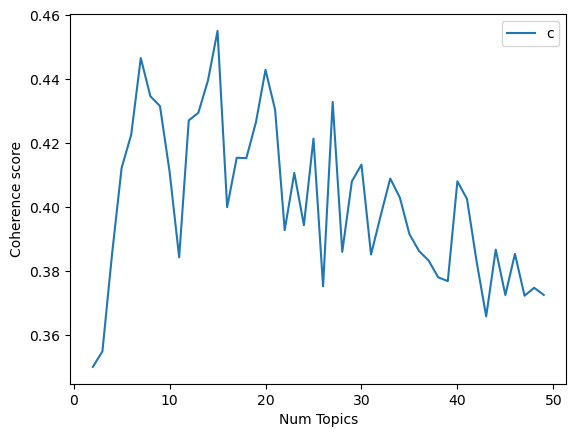

In [12]:
# Show graph
limit=15; start=2; step=1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores


In [13]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3501
Num Topics = 3  has Coherence Value of 0.355
Num Topics = 4  has Coherence Value of 0.3853
Num Topics = 5  has Coherence Value of 0.4123
Num Topics = 6  has Coherence Value of 0.4227
Num Topics = 7  has Coherence Value of 0.4467
Num Topics = 8  has Coherence Value of 0.4347
Num Topics = 9  has Coherence Value of 0.4317
Num Topics = 10  has Coherence Value of 0.4112
Num Topics = 11  has Coherence Value of 0.3844
Num Topics = 12  has Coherence Value of 0.4272
Num Topics = 13  has Coherence Value of 0.4296
Num Topics = 14  has Coherence Value of 0.4396
Num Topics = 15  has Coherence Value of 0.4552
Num Topics = 16  has Coherence Value of 0.4001
Num Topics = 17  has Coherence Value of 0.4155
Num Topics = 18  has Coherence Value of 0.4154
Num Topics = 19  has Coherence Value of 0.4266
Num Topics = 20  has Coherence Value of 0.443
Num Topics = 21  has Coherence Value of 0.4305
Num Topics = 22  has Coherence Value of 0.3929
Num Topics = 23  has Co

In [31]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.090*"food" + 0.020*"cat" + 0.016*"chicken" + 0.012*"love" + 0.011*"dog" + 0.010*"ingredient" + 0.009*"year" + 0.008*"meal" + 0.008*"like" + 0.008*"meat"'),
 (1,
  '0.026*"chip" + 0.020*"amazon" + 0.017*"order" + 0.015*"great" + 0.015*"love" + 0.011*"good" + 0.011*"ordered" + 0.010*"time" + 0.009*"chocolate" + 0.009*"product"'),
 (2,
  '0.029*"sauce" + 0.013*"hair" + 0.013*"bottle" + 0.011*"pasta" + 0.010*"product" + 0.010*"baby" + 0.008*"used" + 0.008*"water" + 0.007*"using" + 0.007*"make"'),
 (3,
  '0.034*"butter" + 0.027*"peanut" + 0.021*"popcorn" + 0.013*"salt" + 0.012*"easy" + 0.010*"cherry" + 0.009*"great" + 0.008*"microwave" + 0.006*"make" + 0.005*"container"'),
 (4,
  '0.019*"sugar" + 0.015*"snack" + 0.014*"calorie" + 0.011*"water" + 0.011*"healthy" + 0.010*"ingredient" + 0.009*"free" + 0.009*"rice" + 0.009*"coconut" + 0.009*"fruit"'),
 (5,
  '0.032*"product" + 0.027*"price" + 0.018*"amazon" + 0.018*"store" + 0.011*"find" + 0.010*"great" + 0.008*"local" + 0.008*"good" 

In [32]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.008575 -0.094279       1        1  26.443978
6     -0.080598  0.042812       2        1  15.252631
5     -0.153792  0.021758       3        1  12.444417
8      0.026253 -0.176884       4        1  12.407170
4      0.165848 -0.104949       5        1   9.431702
1     -0.180203 -0.053919       6        1   8.810569
0      0.007292  0.186187       7        1   7.465459
2      0.108891  0.094948       8        1   4.419419
3      0.097734  0.084327       9        1   3.324656, topic_info=         Term          Freq         Total Category  logprob  loglift
67     coffee  16249.000000  16249.000000  Default  30.0000  30.0000
117      food  15104.000000  15104.000000  Default  29.0000  29.0000
1      amazon   8375.000000   8375.000000  Default  28.0000  28.0000
175      chip   4978.000000   4978.000000  Default  27.0000  27.0000
28      price   8612.000000   8612.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
2665    glass    217.779681    861.715107   Topic9  -5.7076   2.0284
53    product    315.198988  17069.248666   Topic9  -5.3379  -0.5880
591    little    253.348958   8767.682830   Topic9  -5.5564  -0.1403
1043     come    239.275348   3994.928526   Topic9  -5.6135   0.5886
47       good    237.763492  21107.486240   Topic9  -5.6198  -1.0823

[729 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3061      3  0.983187    ability
4060      3  0.992209     absorb
5612      1  0.993550       acai
2075      2  0.990497     addict
6673      7  0.994996  addictive
...     ...       ...        ...
458       9  0.013490       year
3779      2  0.001819     yogurt
3779      5  0.994920     yogurt
3779      9  0.001819     yogurt
6348      2  0.993754      zukes

[2480 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 6, 9, 5, 2, 1, 3, 4])

In [30]:
# Select the model and print the topics
chosen_model = model_list[7]
model_topics = chosen_model.show_topics(formatted=False)

# Naming The Topic

In [37]:
# Naming each topic by the word with height weight. 


topic_names = []
for topic_id, topic_data in model_topics:
    max_word, max_weight = max(topic_data, key=lambda x: x[1])
    topic_names.append((topic_id, max_word))
print('----------------------------------------------')
print("Topic names based on word with highest weight:")
for topic_id, topic_name in topic_names:
    print("Topic {}: {}".format(topic_id, topic_name))


----------------------------------------------
Topic names based on word with highest weight:
Topic 0: food
Topic 1: chip
Topic 2: sauce
Topic 3: butter
Topic 4: sugar
Topic 5: product
Topic 6: treat
Topic 7: like
Topic 8: coffee


# To test more 

- Text Vectorizing: Bert Model, Word2vec